In [106]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [107]:
experiment_time_ms = 19000

In [108]:
df = pd.read_csv('rawdata/1645703267/pulseTS1.csv', header=None, names=["value", "ts"])
df

,value,ts
0,368,0
1,368,10
2,359,20
3,353,30
4,349,40
...,...,...
1728,316,17280
1729,319,17290
1730,328,17300
1731,342,17310


In [109]:
original_count = len(df['value'])
original_count

1733

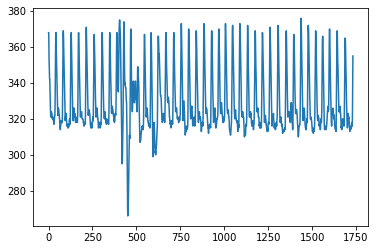

In [110]:
ax = plt.gca()
plt.plot(df.index, df['value'])

In [111]:
# remove small values
df = df.drop(df[df.value < 330].index)

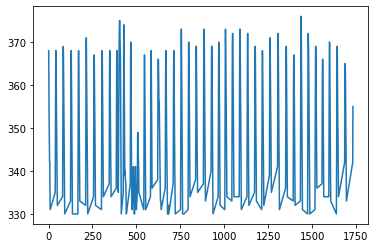

In [112]:
plt.plot(df.index, df['value'])

In [113]:
# number of points to be checked before and after
n = 5 
df['max'] = df.iloc[argrelextrema(df.value.values, np.greater_equal, order=n)[0]]['value']

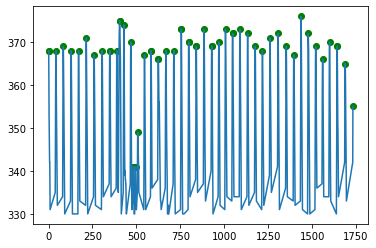

In [114]:
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['value'])

In [115]:
df = df.dropna()

In [116]:
peaks_count = len(df['max'])
peaks_count

57

In [117]:
# miliseconds
HRV = experiment_time_ms / peaks_count
HRV

333.3333333333333